In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class)
# sibsp: Number of siblings or spouses the passenger had aboard the Titanic
# parch: Number of parents or children the passenger had aboard the Titanic.
# embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# class: Alternative representation of pclass as a categorical variable (First, Second, Third)
# who: Simplified categorization of passengers (man, woman, child)
# adult_male: Whether the passenger is an adult male (True or False)
# deck: Deck level of the cabin (A, B, C, D, E, F, G, or NaN if unknown)
# embark_town: Full name of the embarkation town (Cherbourg, Queenstown, Southampton)
# alive: Whether the passenger survived, represented as yes or no (alternative to survived)
# alone: Whether the passenger was alone (True = No family aboard, False = Had family aboard)

In [ ]:
# Displaying Correlation Matrix to understand impact of numeric features on survival status
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
corr_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


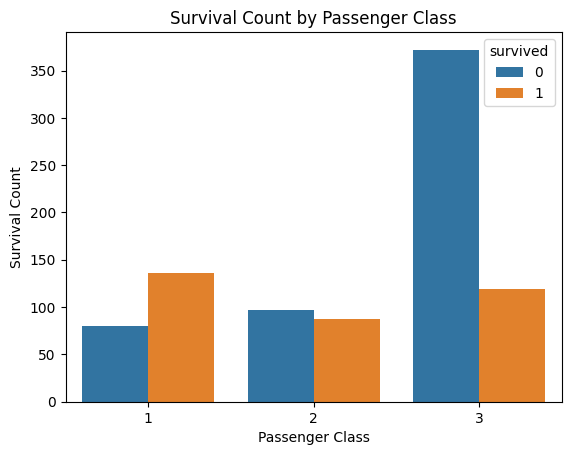

In [ ]:
# Draw a plot for pclass vs survived
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Count')
plt.show()

In [ ]:
# Analysis: Higher-class passengers had a better chance of survival.
# First-class passengers were given priority in lifeboats

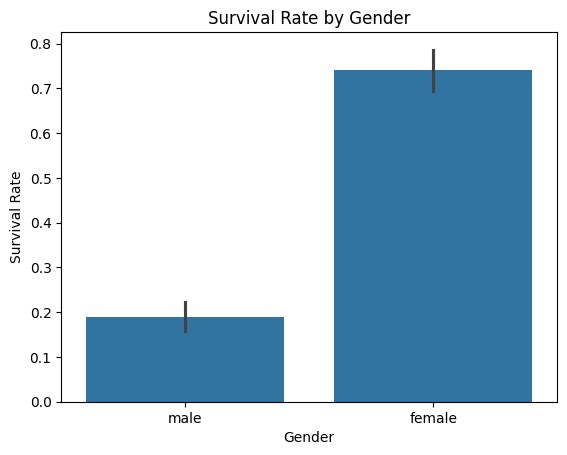

In [ ]:
# Draw a plot for Gender vs survived
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Analysis: Females had much higher survival rates than males.
# Women were prioritized in lifeboat access ("Women and children first" rule)

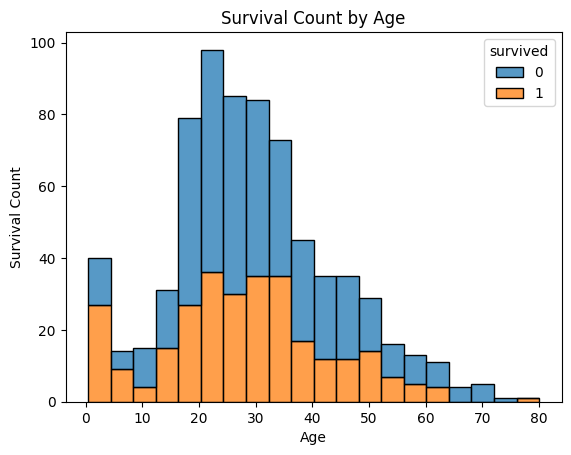

In [ ]:
# Draw a plot for age vs survived
sns.histplot(x='age', hue='survived', data=df, multiple="stack")
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Survival Count')
plt.show()

In [ ]:
# More children (lower age) survived.
# Older passengers had lower survival rates.

<ipython-input-12-b3351bf57d00>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="embarked", y="survived", data=df, ci=None, palette="coolwarm")
<ipython-input-12-b3351bf57d00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="embarked", y="survived", data=df, ci=None, palette="coolwarm")


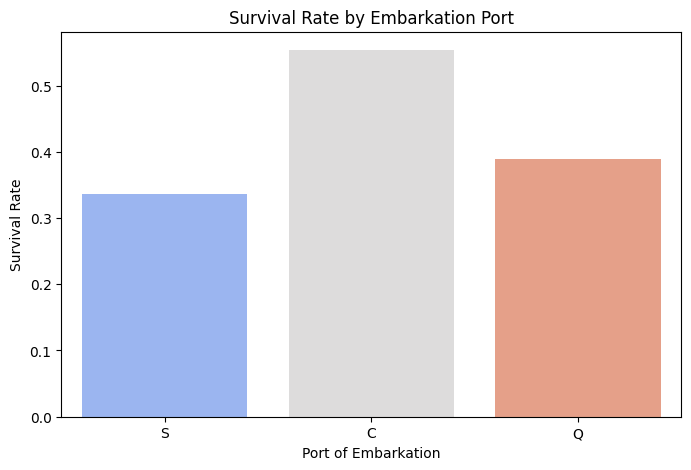

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="embarked", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Passengers who embarked from Cherbourg (C) had a higher survival rate.
# Queenstown (Q) had the lowest survival rate.

<ipython-input-14-eb3c00e9434c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="fare", data=df, palette="coolwarm")


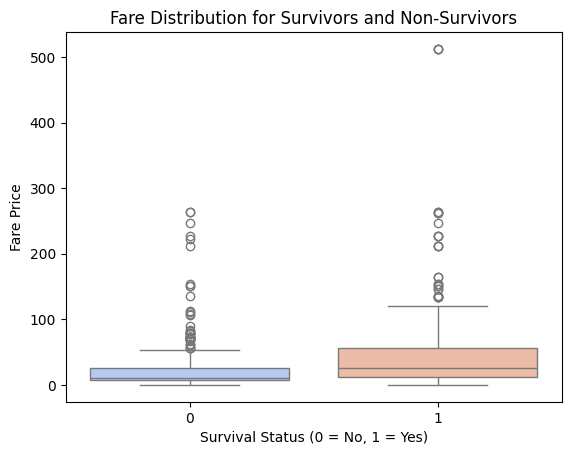

In [ ]:
sns.boxplot(x="survived", y="fare", data=df, palette="coolwarm")
plt.title("Fare Distribution for Survivors and Non-Survivors")
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Fare Price")
plt.show()

In [ ]:
# Survivors generally paid higher fares, indicating first-class passengers had better survival chances

<ipython-input-16-53222e24e80f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sibsp", y="survived", data=df, ci=None, palette="coolwarm")
<ipython-input-16-53222e24e80f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sibsp", y="survived", data=df, ci=None, palette="coolwarm")


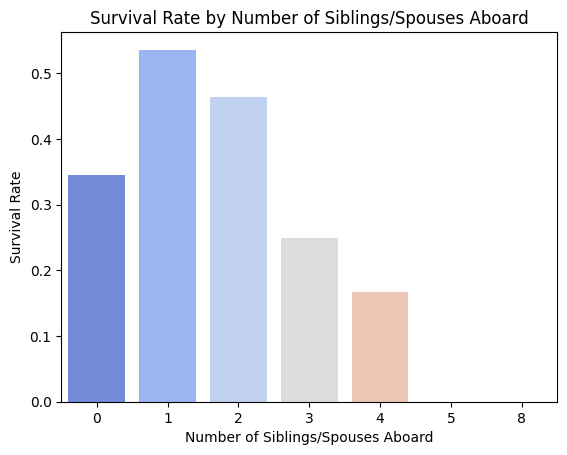

In [ ]:
sns.barplot(x="sibsp", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Passengers with 1–2 siblings/spouses had higher survival rates.
# Those alone (0 sibsp) had a lower survival rate.
# Large families (sibsp ≥3) had the lowest survival rate, likely due to difficulty in securing enough lifeboat seats.

<ipython-input-18-261d4b2d5e2c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deck", y="survived", data=df, ci=None, palette="coolwarm", order=df["deck"].value_counts().index)
<ipython-input-18-261d4b2d5e2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deck", y="survived", data=df, ci=None, palette="coolwarm", order=df["deck"].value_counts().index)


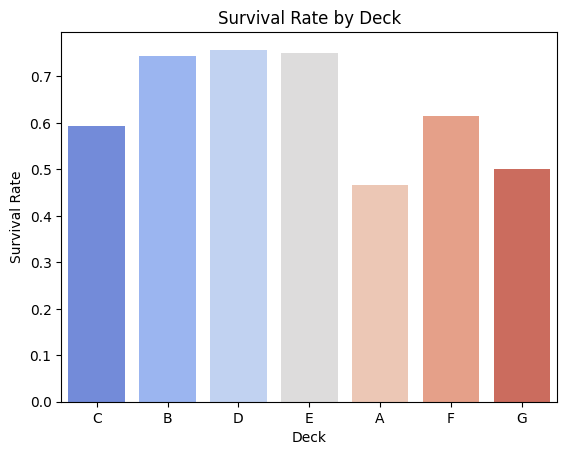

In [ ]:
sns.barplot(x="deck", y="survived", data=df, ci=None, palette="coolwarm", order=df["deck"].value_counts().index)
plt.title("Survival Rate by Deck")
plt.xlabel("Deck")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
order=df["deck"].value_counts().index
order

CategoricalIndex(['C', 'B', 'D', 'E', 'A', 'F', 'G'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, dtype='category', name='deck')

In [ ]:
df["deck"].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
# Most passengers' deck information is missing (NaN values).
#1. Highest Survival Rates:
# Decks B, D, and E had the highest survival rates (above 70%).
# These decks were occupied mostly by first-class passengers, who had better access to lifeboats.
# Moderate Survival Rates:
# Decks C and F had survival rates between 50-65%.
# Deck C was also occupied by many first-class passengers, though not as privileged as decks B, D, and E.
# Deck F housed second-class passengers, leading to a relatively lower survival rate.
# Lowest Survival Rates:
# Decks A and G had the lowest survival rates (below 50%).
# Deck A had fewer lifeboats nearby, while Deck G was among the lowest decks, making escape difficult during flooding.

<ipython-input-22-dc98ea2c9f4a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="embark_town", y="survived", data=df, ci=None, palette="coolwarm")
<ipython-input-22-dc98ea2c9f4a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="embark_town", y="survived", data=df, ci=None, palette="coolwarm")


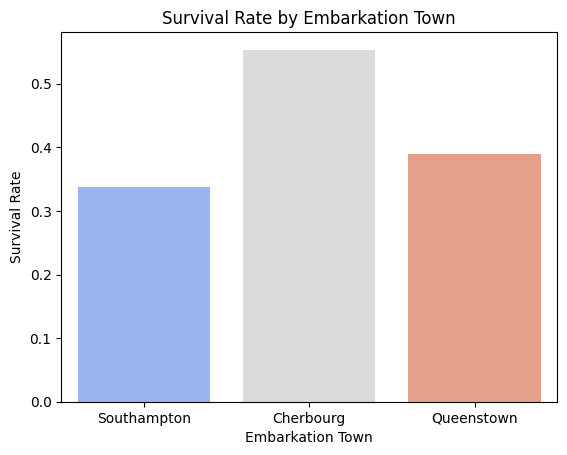

In [ ]:
sns.barplot(x="embark_town", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Embarkation Town")
plt.xlabel("Embarkation Town")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Impact: Somewhat affects survival.
# Reason: More first-class passengers boarded at Cherbourg (C), increasing survival rates.

In [ ]:
# Write a code to check how the price of the ticket (column name: 'fare') for each passenger
# is distributed by plotting a histogram.

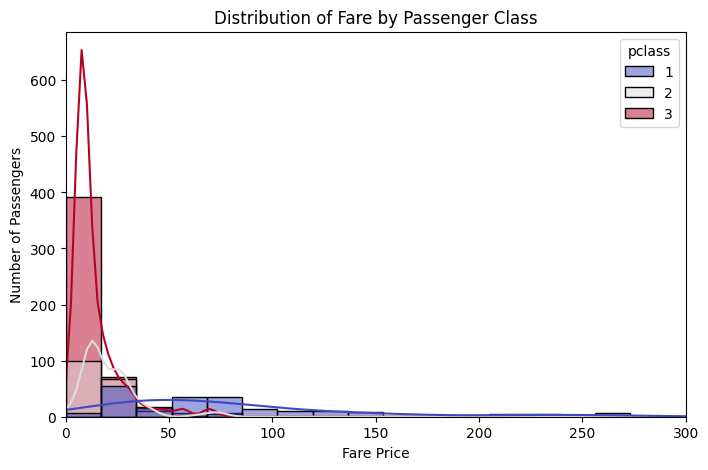

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="fare", hue="pclass", bins=30, kde=True, palette="coolwarm")
plt.title("Distribution of Fare by Passenger Class")
plt.xlabel("Fare Price")
plt.ylabel("Number of Passengers")
plt.xlim(0, 300) # Excluding extreme outliers for better visualization
plt.show()

In [ ]:
# Observations:
# First-class (pclass = 1) passengers paid significantly higher fares.
# Third-class (pclass = 3) passengers paid much lower fares.
# Most fares are below $100, but a few wealthy passengers paid over $300.
# First-class fares show a wider range, while third-class fares are mostly lower and concentrated.

In [ ]:
# Key Takeaways from Visualizations
# Women, children, and first-class passengers had higher survival rates.
# Higher fares correspond to higher survival rates (first-class passengers).
# Embarkation point matters (Cherbourg had better survival rates).
# Older passengers had lower survival rates.